# ◆Mushroom Classification Safe to eat or deadly poison?
### 目的：形状や生息地等からきのこが食用か有毒かを識別する
### 食用か有毒かの二値分類問題として決定木とロジスティック回帰を使った予測モデルを構築する
- kaggle URL:https://www.kaggle.com/uciml/mushroom-classification/data
- Create Date：2020/01/17　Author：M.Hasegawa
### ────────────────────────────────────────────────────────────────

### 【手順】

### 0.Notebook内で利用する関数の定義

### 1.データ読込
- 欠損項目を確認する

### 2.データ前処理
- 目的変数を説明するのに有効そうな説明変数を見つける。
- 目的変数と説明変数の関係を確認するためのグラフを作成する。
- 質的変数が扱えない場合は、ダミー変数に置き換える。

### 3.モデル構築
- ロジスティック回帰モデルを利用する
- 決定木モデルを利用する

### 4.モデル評価
- 混同行列を作成し、Accuracy、Recall、Precisionを求める

### ※データセット
- 「mushrooms.csv」（データ数：378,661行15列）

| id |項目|説明|型|特記事項|
|:---:|:---:|:---:|:---:|:---:|
|1|class|毒キノコか|カテゴリ|毒キノコ=p、食用キノコ=e|
|2|cap-shape|傘形状|カテゴり|ベル型=b、円錐型=c、饅頭型=x、扁平型=f、コブ型=k、凹んだ扁平型=s|
|3|cap-surface|傘表面|カテゴリ|繊維=f、溝=g、鱗片=y、滑らか=s|
|4|cap-color|傘の色|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、グリーン=r、ピンク=p、パープル=u、レッド=e、ホワイト=w、イエロー=y|
|5|bruises|斑点|2値|斑点あり=t、反転なし=f|
|6|odor|臭気|カテゴリ|アーモンド=a、アニス=l、クレオソート=c、フィッシュ=y、ファウル=f、ミューズイ=m、なし=n、辛味=p、スパイシー=s|
|7|gill-attachment|ひだの付き方|カテゴリ|直生=a、垂生=d、離生=f、凹生=n|
|8|gill-spacing|ひだの間隔|カテゴリ|近い=c、過密=w、長い=d|
|9|gill-size|ひだのサイズ|2値|広い=b、狭い=n|
|10|gill-color|ひだの色|カテゴリ|ブラック=k、ブラウン=n、バフ=b、チョコレート=h、グレー=g、グリーン=r、オレンジ=o、ピンク=p、パープル=u、レッド=e、ホワイト=w、イエロー=y|
|11|stalk-shape|柄の形状|2値|広がり=e、先細り=t|
|12|stalk-root|柄の根|カテゴリ|球根=b、クラブ=c、カップ=u、等しい=e、根茎形態=z、根=r、無し=?|
|13|stalk-surface-above-ring|柄-表面上のリング|カテゴリ|繊維状=f、鱗片状=y、絹毛=k、滑らか=s|
|14|stalk-surface-below-ring|柄-表面下のリング|カテゴリ|繊維状=f、鱗片状=y、絹毛=k、滑らか=s|
|15|stalk-color-above-ring|柄の色-上リング|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、オレンジ=o、ピンク=p、赤=e、白=w、黄色=y|
|16|stalk-color-below-ring|柄の色-下リング|カテゴリ|ブラウン=n、バフ=b、シナモン=c、グレー=g、オレンジ=o、ピンク=p、赤=e、白=w、黄色=y|
|17|veil-type|つぼの種類|2値|内皮膜=p、外皮膜=u|
|18|veil-color|つぼの色|カテゴリ|ブラウン=n、オレンジ=o、ホワイト=w、イエロー=y|
|19|ring-number|つばの数|カテゴリ|none=n、one=o、two=t|
|20|ring-type|つばの種類|カテゴリ|クモの巣状=c、消失性=e、炎のような=f、大きな=l、無し=n、垂れた=p、環帯=z|
|21|spore-print-color|胞子の色|カテゴリ|ブラック=k、ブラウン=n、バフ=b、チョコレート=h、グリーン=r、オレンジ=o、パープル=u、ホワイト=w、イエロー=y|
|22|population|集団形成方法|カテゴリ|大多数=a、群れを成して=c、多数=n、分散=s、数個=v、孤立=y|
|23|habitat|生息地|カテゴリ|牧草=g、葉=1、牧草地=m、小道=p、都市=u、廃棄物=w、森=d|

キノコの部位
![](https://i.pinimg.com/originals/0a/c6/4f/0ac64fb5a9c29823572de772f4ba1ff1.jpg)

## 0.Notebook内で利用する関数の定義

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import category_encoders as ce
import seaborn as sns
import graphviz
import pydotplus
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.model_selection import train_test_split
from IPython.display         import Markdown, display
from sklearn.tree import export_graphviz, DecisionTreeClassifier
from sklearn.metrics import log_loss, accuracy_score, confusion_matrix,precision_recall_fscore_support

# ****************************************************************************
# 設定値
# ****************************************************************************

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 30)

# ============================================================================
# MarkDown記法
# ============================================================================
def printmd(string):
    display(Markdown('\n\n**' + string + '**'))

# 1.データ読込

In [2]:
df= pd.read_csv('./input/mushrooms.csv')

printmd("▼ データサイズ")
display(df.shape)

printmd("▼ 先頭5行表示")
display(df.head(3))

print("\n▼ 基本統計量")
display(df.describe())

print('\n▼ 欠損データ確認')
display(pd.DataFrame(df.isnull().sum()[df.isnull().sum()>0],columns=['Missing num']))



**▼ データサイズ**

(8124, 23)



**▼ 先頭5行表示**

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m



▼ 基本統計量


,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148



▼ 欠損データ確認


,Missing num


# 2.データ前処理
## 2-1.目的変数の確認



**▼ 目的変数classの種類（%）**

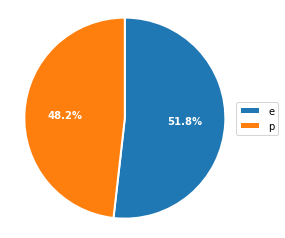

→食用のほうが若干多い




**▼ 件数（食用キノコ=1，毒キノコ=0）**

,class
1,4208
0,3916




**▼ 食用きのこ率**

baseline= 0.517971442639094




**▼ 先頭5行表示**

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,1,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,1,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,0,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,1,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [3]:
printmd('▼ 目的変数classの種類（%）')
per_class = round(df['class'].value_counts() / len(df['class']) * 100,2)
values = list(per_class.values)

# 円グラフ
plt.figure(figsize=(4,4))
plt.pie(values, labels=list(per_class.index),
        wedgeprops={'linewidth': 2,'edgecolor':'white'},
        textprops={'color': 'white', 'weight': 'bold'},
        counterclock=False,startangle=90,
        autopct=lambda p: '{:.1f}%'.format(p) if p >= 2.5 else '')
lgnd=plt.legend(bbox_to_anchor=(1.0, 0.25, 1.55, 0.5), loc="center left", borderaxespad=0.)
plt.axis('equal')
plt.show()
print('→食用のほうが若干多い')

# 変換（食用キノコ=1，毒キノコ=0）
df['class'] = df['class'].map({'p': 0,'e': 1})

printmd('▼ 件数（食用キノコ=1，毒キノコ=0）')
display(pd.DataFrame(df['class'].value_counts(),columns=['class']))

# 食用率の平均
printmd('▼ 食用きのこ率')
baseline = df['class'].mean()
print('baseline=',baseline)

printmd("▼ 先頭5行表示")
display(df.head(5))


### 2-2.説明変数の前処理

In [4]:
# 名前の変換
v_01={"b":"bell","c":"conical","x":"convex","f":"flat","k":"knobbed","s":"sunken"}
df["cap-shape"]=df["cap-shape"].replace(v_01)

v_02={"f": "fibrous", "g": "grooves","y":"scaly","s": "smooth"}
df["cap-surface"]=df["cap-surface"].replace(v_02)

v_03={"n":"brown","b":"buff","c":"cinnamon","g":"gray","r":"green","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["cap-color"]=df["cap-color"].replace(v_03)

v_04={"a":"almond","l":"anise","c":"creosote","y":"fishy","f":"foul","m":"musty","n":"none","p":"pungent","s":"spicy"}
df["odor"]=df["odor"].replace(v_04)

v_05={"a":"attached","f":"free"}
df["gill-attachment"]=df["gill-attachment"].replace(v_05)

v_06={"c":"close","w":"crowded"}
df["gill-spacing"]=df["gill-spacing"].replace(v_06)

v_07={"b":"broad","n":"narrow"}
df["gill-size"]=df["gill-size"].replace(v_07)

v_08={"k":"black","b":"buff","n":"brown","h":"chocolate","g":"gray","r":"green","o":"orange","p":"pink","u":"purple","e":"red","w":"white","y":"yellow"}
df["gill-color"]=df["gill-color"].replace(v_08)

v_09={"t":"tapering","e":"enlarging"}
df["stalk-shape"]=df["stalk-shape"].replace(v_09)

v_10={"b":"bulbous","c":"club","e":"equal","z":"rhizomorphs","r":"rooted","?":"missing"}
df["stalk-root"]=df["stalk-root"].replace(v_10)

v_11={"s":"smooth","k":"silky","f":"fibrous","y":"scaly"}
df["stalk-surface-above-ring"]=df["stalk-surface-above-ring"].replace(v_11)
df["stalk-surface-below-ring"]=df["stalk-surface-below-ring"].replace(v_11)

v_12={"n":"brown","b":"buff","c":"cinnamon","g":"gray","p":"pink","e":"red","w":"white","y":"yellow","o":"orange"}
df["stalk-color-above-ring"]=df["stalk-color-above-ring"].replace(v_12)
df["stalk-color-below-ring"]=df["stalk-color-below-ring"].replace(v_12)

v_13={"p":"partial","u":"universal"} 
df["veil-type"]=df["veil-type"].replace(v_13)

v_14={"n":"brown","o":"orange","w":"white","y":"yellow"} 
df["veil-color"]=df["veil-color"].replace(v_14)

v_15= {"n":"none","o":"one","t":"two"}
df["ring-number"]=df["ring-number"].replace(v_15)

v_16={"c":"cobwebby","e":"evanescent","f":"flaring","l":"large","n":"none","p":"pendant","s":"sheathing","z":"zone"}
df["ring-type"]=df["ring-type"].replace(v_16)

v_17= {"k":"black","n":"brown","b":"buff","h":"chocolate","r":"green","o":"orange","u":"purple","w":"white","y":"yellow"}
df["spore-print-color"]=df["spore-print-color"].replace(v_17)

v_18={"a":"abundant","c":"clustered","n":"numerous","s":"scattered","v":"several","y":"solitary"}
df["population"]=df["population"].replace(v_18)

v_19={"g":"grasses","l":"leaves","m":"meadows","p":"paths","u":"urban","w":"waste","d":"woods"}
df["habitat"]=df["habitat"].replace(v_19)

v_20={"t":"bruises","f":"no"}
df["bruises"]=df["bruises"].replace(v_20)


# 判別時に利用しづらいものを削除
#df = df.drop(['stalk-root'],axis=1)
#df = df.drop(['spore-print-color'],axis=1)
#df = df.drop(['habitat'],axis=1)
#df = df.drop(['stalk-surface-below-ring'],axis=1)
#df = df.drop(['stalk-surface-above-ring'],axis=1)
#df = df.drop(['stalk-shape'],axis=1)

print('\n ▼ カラムの型リスト表示 ')
col_list = df.columns.tolist() 
display(df[col_list].dtypes.sort_values()) 

# int64リスト
int_cols = df[col_list].dtypes[df[col_list].dtypes=='int64'].index.tolist()

# objectリスト
obj_cols = df[col_list].dtypes[df[col_list].dtypes=='object'].index.tolist()



 ▼ カラムの型リスト表示 


class                        int64
spore-print-color           object
ring-type                   object
ring-number                 object
veil-color                  object
veil-type                   object
stalk-color-below-ring      object
stalk-color-above-ring      object
stalk-surface-below-ring    object
stalk-surface-above-ring    object
population                  object
stalk-root                  object
gill-color                  object
gill-size                   object
gill-spacing                object
gill-attachment             object
odor                        object
bruises                     object
cap-color                   object
cap-surface                 object
cap-shape                   object
stalk-shape                 object
habitat                     object
dtype: object


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

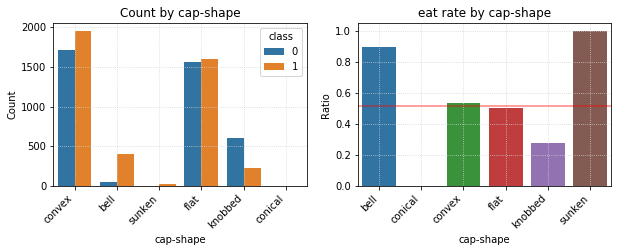


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

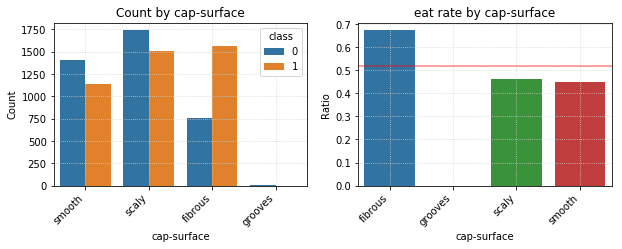


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

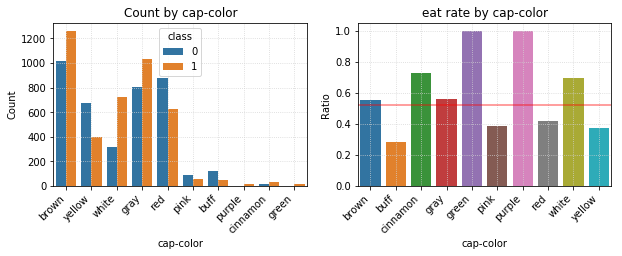


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

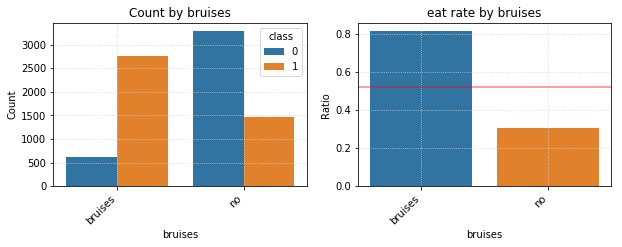


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

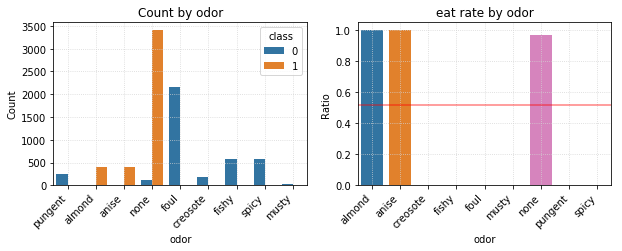


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

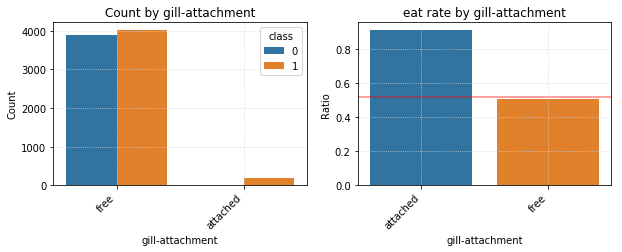


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

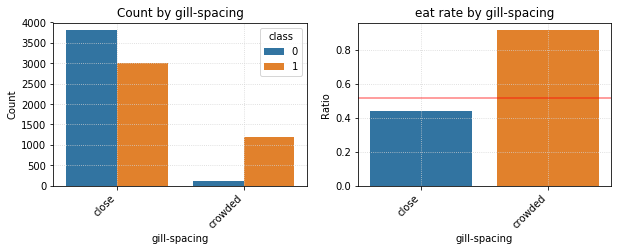


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

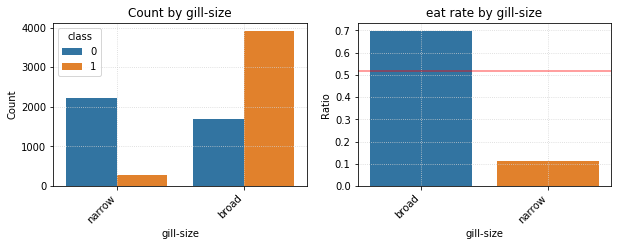


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

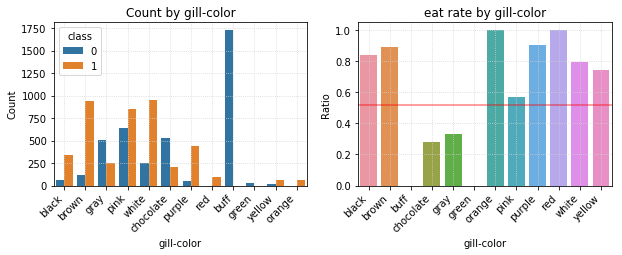


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

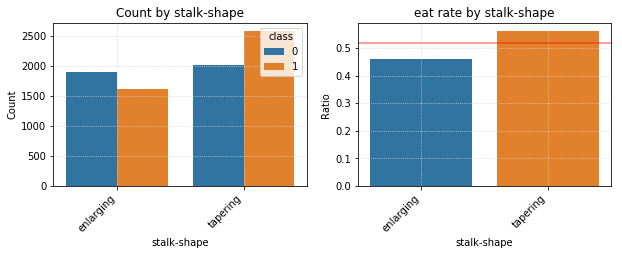


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

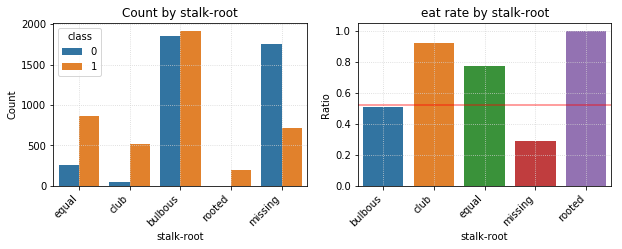


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

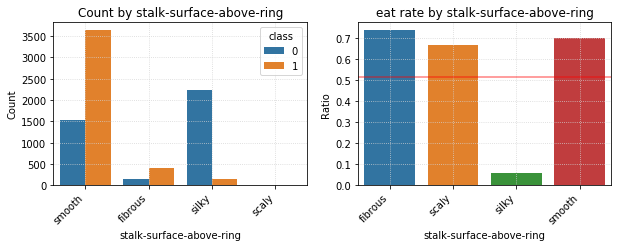


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

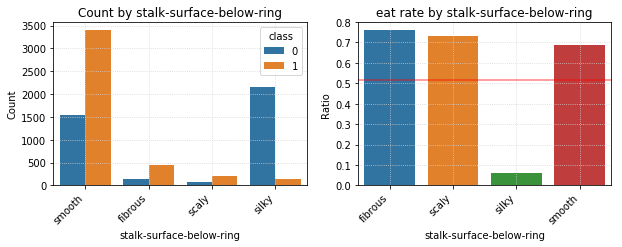


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

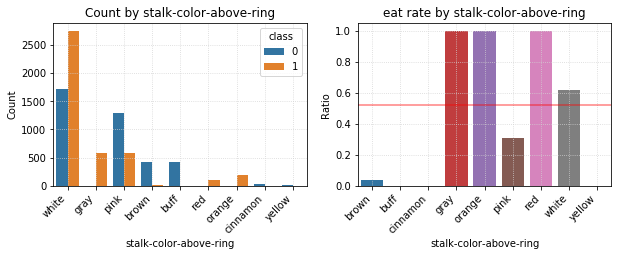


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

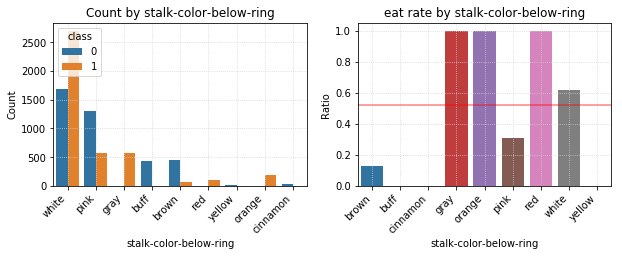


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

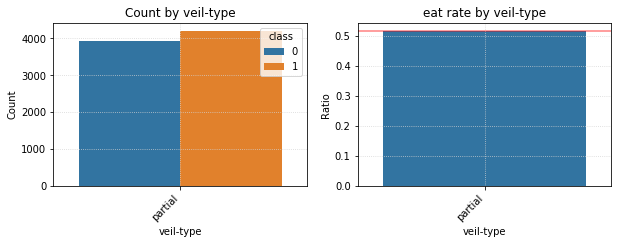


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

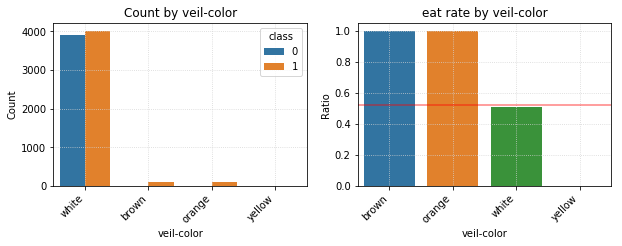


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

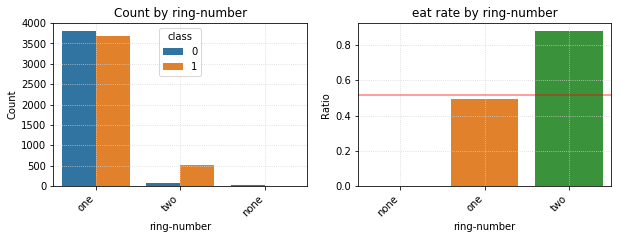


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

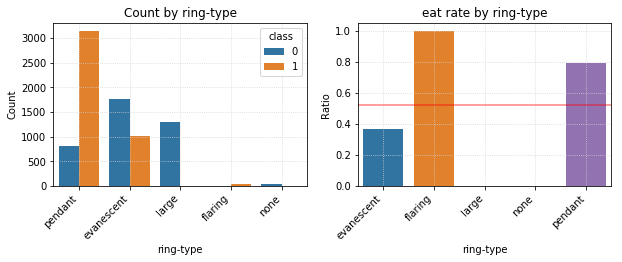


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

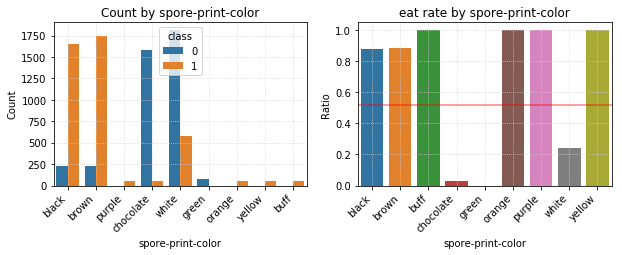


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

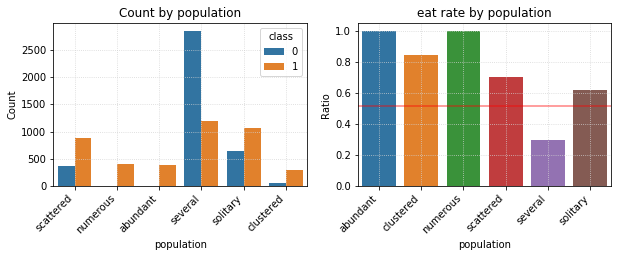


 ──────────────────────────────────────── 


<Figure size 432x288 with 0 Axes>

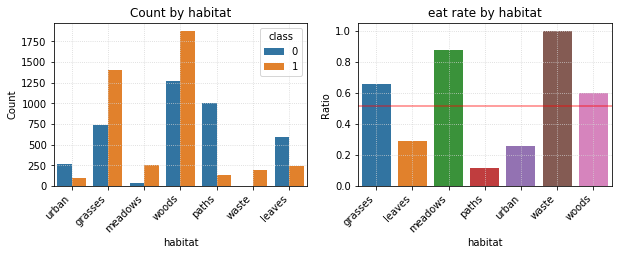

<Figure size 432x288 with 0 Axes>

In [5]:
# ------------------------------------------------
# 2-3-3.カテゴリ項目の確認
# ------------------------------------------------    

for col_name in obj_cols:
    print('\n ──────────────────────────────────────── ')
    plt.subplots_adjust(wspace=2.0, hspace=2.0) # 余白
    plt.figure(figsize=(10,3))
    
    # カウントプロット
    plt.subplot(1,2,1)
    ax = sns.countplot(df[col_name],hue=df['class'])
    ax.set_title('Count by ' + str(col_name))
    plt.grid(which='major',color='lightgray',linestyle=':')
    plt.grid(which='minor',color='lightgray',linestyle=':')
    ax.set_xlabel(col_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") # ラベルの回転
    ax.set_ylabel('Count')
    
    # 食用率プロット
    plt.subplot(1,2,2)
    eat_rate = pd.DataFrame(df['class'].groupby(df[col_name]).mean())
    eat_rate.reset_index(inplace = True) # index振り直し
    ax = sns.barplot(x=col_name, y="class", data=eat_rate)
    ax.axhline(baseline, alpha=0.5, color='red') # 平均値
    ax.set_title('eat rate by ' + str(col_name))
    plt.grid(which='major',color='lightgray',linestyle=':')
    plt.grid(which='minor',color='lightgray',linestyle=':')
    ax.set_xlabel(col_name)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right") # ラベルの回転
    ax.set_ylabel('Ratio')
    plt.show()
    plt.tight_layout() # 重ならないように


### 2-5.ダミー変換

In [6]:
X_train_df, X_test_df, y_train_df, y_test_df = train_test_split(df.drop('class', axis=1), df['class'],
                                                                test_size=0.3, random_state=1234)


# one-hot-encoding
ce_ohe = ce.OneHotEncoder(cols=obj_cols, use_cat_names=True)
enc_X_train_df = ce_ohe.fit_transform(X_train_df)
enc_X_test_df = ce_ohe.transform(X_test_df)

printmd('▼ カテゴリ変換後')
display(enc_X_train_df.head(5))

X_train = enc_X_train_df
y_train = y_train_df
X_test = enc_X_test_df
y_test = y_test_df

# ndarrayに変換
#X_train = enc_X_train_df.values
#y_train = y_train_df.values
#X_test = enc_X_test_df.values
#y_test = y_test_df.values



**▼ カテゴリ変換後**

,cap-shape_flat,cap-shape_convex,cap-shape_bell,cap-shape_knobbed,cap-shape_sunken,cap-shape_conical,cap-surface_scaly,cap-surface_smooth,cap-surface_fibrous,cap-surface_grooves,cap-color_yellow,cap-color_white,cap-color_gray,cap-color_red,cap-color_pink,cap-color_brown,cap-color_buff,cap-color_cinnamon,cap-color_green,cap-color_purple,bruises_bruises,bruises_no,odor_anise,odor_pungent,odor_none,odor_fishy,odor_creosote,odor_foul,odor_spicy,odor_almond,odor_musty,gill-attachment_free,gill-attachment_attached,gill-spacing_close,gill-spacing_crowded,gill-size_broad,gill-size_narrow,gill-color_brown,gill-color_white,gill-color_purple,gill-color_buff,gill-color_chocolate,gill-color_gray,gill-color_black,gill-color_pink,gill-color_yellow,gill-color_red,gill-color_orange,gill-color_green,stalk-shape_enlarging,stalk-shape_tapering,stalk-root_rooted,stalk-root_equal,stalk-root_bulbous,stalk-root_missing,stalk-root_club,stalk-surface-above-ring_smooth,stalk-surface-above-ring_silky,stalk-surface-above-ring_fibrous,stalk-surface-above-ring_scaly,stalk-surface-below-ring_scaly,stalk-surface-below-ring_smooth,stalk-surface-below-ring_fibrous,stalk-surface-below-ring_silky,stalk-color-above-ring_white,stalk-color-above-ring_pink,stalk-color-above-ring_buff,stalk-color-above-ring_gray,stalk-color-above-ring_orange,stalk-color-above-ring_cinnamon,stalk-color-above-ring_red,stalk-color-above-ring_brown,stalk-color-above-ring_yellow,stalk-color-below-ring_white,stalk-color-below-ring_pink,stalk-color-below-ring_gray,stalk-color-below-ring_orange,stalk-color-below-ring_buff,stalk-color-below-ring_brown,stalk-color-below-ring_red,stalk-color-below-ring_cinnamon,stalk-color-below-ring_yellow,veil-type_partial,veil-color_white,veil-color_orange,veil-color_brown,veil-color_yellow,ring-number_one,ring-number_two,ring-number_none,ring-type_pendant,ring-type_evanescent,ring-type_large,ring-type_none,ring-type_flaring,spore-print-color_brown,spore-print-color_white,spore-print-color_black,spore-print-color_chocolate,spore-print-color_orange,spore-print-color_yellow,spore-print-color_green,spore-print-color_buff,spore-print-color_purple,population_solitary,population_several,population_scattered,population_numerous,population_abundant,population_clustered,habitat_grasses,habitat_urban,habitat_woods,habitat_paths,habitat_leaves,habitat_meadows,habitat_waste
756,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2004,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2135,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
6513,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
3679,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0


# 3.モデル構築
## 3-1. [ロジスティック回帰](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html)



**▼ 重みを表示（絶対値の降順：Top10）**

,feature,weight
0,odor_none,81.404472
1,odor_foul,-58.935024
2,spore-print-color_green,-54.567099
3,stalk-root_bulbous,-51.598187
4,gill-size_narrow,-43.963913
5,gill-size_broad,41.207834
6,odor_anise,39.766745
7,population_numerous,39.033775
8,odor_pungent,-38.953464
9,odor_creosote,-37.009325




**▼ 重みの大きさを横棒グラフで表示**

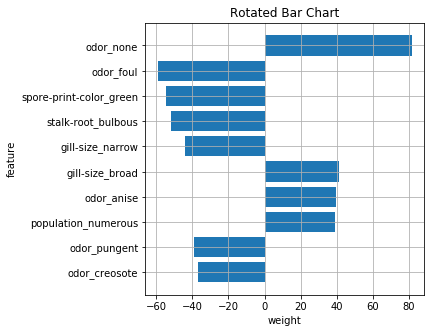



**▼ モデルの予測結果(先頭10件)**

[1 0 1 1 1 0 0 1 1 0 0]




**▼ 結果の予測確率(先頭10件)
(毒キノコの確率：食用キノコの確率):**

[[0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 1.17830537e-057]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 4.79524230e-082]
 [1.00000000e+000 8.70685740e-089]
 [0.00000000e+000 1.00000000e+000]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 2.61986450e-049]
 [1.00000000e+000 2.10779988e-109]]




**▼ モデルの評価結果**

対数尤度 = -0.000
正答率 = 100.000%
適合率（Precision※精度) = 100.000%
再現率（Recall※検出率) = 100.000%
F1値（F1-score） = 100.000%




**▼ 混同行列**

,予測 = 毒キノコ,予測 = 食用キノコ
正解 = 毒キノコ,1186,0
正解 =食用キノコ,0,1252


In [7]:
# ロジスティック回帰モデル生成
clf = SGDClassifier(loss='log',penalty='none',max_iter=10000,fit_intercept=True,random_state=1234,tol=1e-3)

# 学習
clf.fit(X_train, y_train)

#print('w0 = {:.3f}'.format(clf.intercept_[0]))

# 結果をDataFrameへ格納
res_df = pd.DataFrame(columns=['feature','weight','abs_w'])
res_df['feature'] = list(enc_X_train_df.columns)
res_df['weight'] = np.reshape(clf.coef_[0], -1).tolist() # 重み
res_df['abs_w'] = abs(res_df['weight']) # 絶対値

# 重みの絶対値の降順ソート
printmd('▼ 重みを表示（絶対値の降順：Top10）')
res_df = res_df.sort_values('abs_w', ascending=False)
res_df.reset_index(drop=True,inplace=True)
res_df = res_df.drop('abs_w', axis=1)
res_df_head = res_df.head(10)
display(res_df_head.head(10))

# 重みの大きさを横棒グラフで表示
printmd('▼ 重みの大きさを横棒グラフで表示')
plt.figure(figsize=(5, 5))
plt.barh(np.arange(len(res_df_head['feature']))[::-1], res_df_head['weight'], align='center')
plt.yticks(np.arange(len(res_df_head['feature']))[::-1], res_df_head['feature'])
plt.title('Rotated Bar Chart')
plt.xlabel('weight')
plt.ylabel('feature')
plt.grid()
plt.show()

y_est = clf.predict(X_test)

printmd('▼ モデルの予測結果(先頭10件)')
print(y_est[:11])

printmd('▼ 結果の予測確率(先頭10件)\n(毒キノコの確率：食用キノコの確率):')
print(clf.predict_proba(X_test)[:11])

printmd('▼ モデルの評価結果')

print('対数尤度 = {:.3f}'.format(- log_loss(y_test, y_est)))
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est)))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est)
print('適合率（Precision※精度) = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall※検出率) = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))
printmd('▼ 混同行列')
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est), 
                        index=['正解 = 毒キノコ', '正解 =食用キノコ'], 
                        columns=['予測 = 毒キノコ', '予測 = 食用キノコ'])

display(conf_mat)

## 3-2. [決定木](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [8]:
# 決定木モデル生成
dt = DecisionTreeClassifier(max_depth=5, min_samples_split=15, min_samples_leaf=20, random_state=1234)
dt.fit(X_train, y_train)
y_est_dt = dt.predict(X_test)

printmd('▼ モデルの評価結果')
print('正答率 = {:.3f}%'.format(100 * accuracy_score(y_test, y_est_dt)))

# Precision, Recall, F1-scoreを計算
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_est_dt)
print('適合率（Precision※精度) = {:.3f}%'.format(100 * precision[0]))
print('再現率（Recall※検出率) = {:.3f}%'.format(100 * recall[0]))
print('F1値（F1-score） = {:.3f}%'.format(100 * f1_score[0]))
printmd('▼ 混同行列')
conf_mat = pd.DataFrame(confusion_matrix(y_test, y_est_dt), 
                        index=['正解 = 毒キノコ', '正解 =食用キノコ'], 
                        columns=['予測 = 毒キノコ', '予測 = 食用キノコ'])

display(conf_mat)



**▼ モデルの評価結果**

正答率 = 99.426%
適合率（Precision※精度) = 99.161%
再現率（Recall※検出率) = 99.663%
F1値（F1-score） = 99.411%




**▼ 混同行列**

,予測 = 毒キノコ,予測 = 食用キノコ
正解 = 毒キノコ,1182,4
正解 =食用キノコ,10,1242


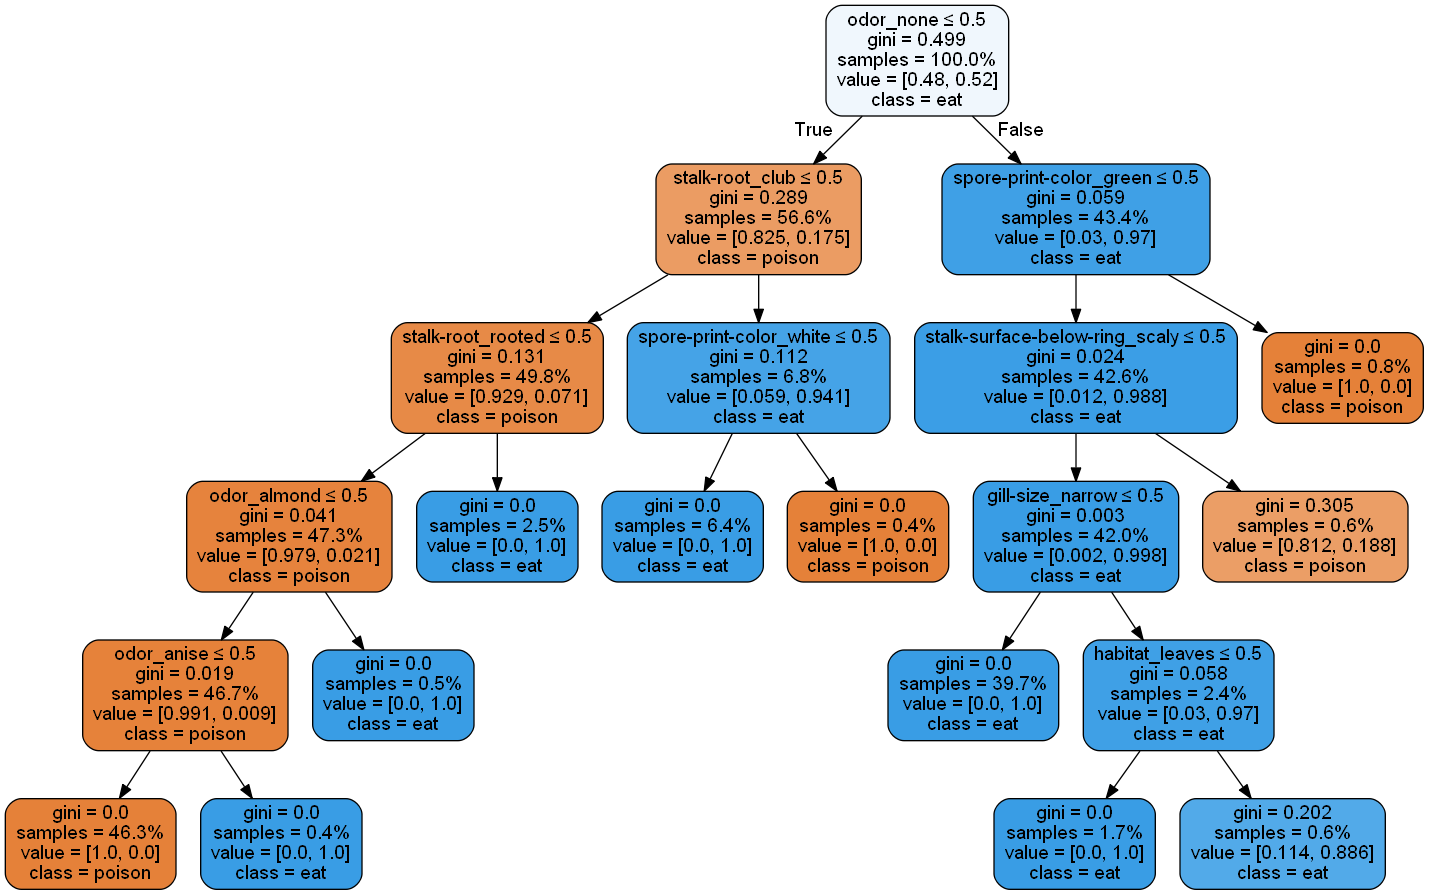

In [25]:
# 決定木の描画
dot_data = StringIO() #dotファイル情報の格納先
export_graphviz(dt, out_file=dot_data,
                feature_names=X_test.columns,
                class_names=['poison','eat'],
                filled=True,rounded=True,  
                special_characters=True,
                proportion = True
               ) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

## Appendix. [dtreeviz](https://github.com/parrt/dtreeviz)

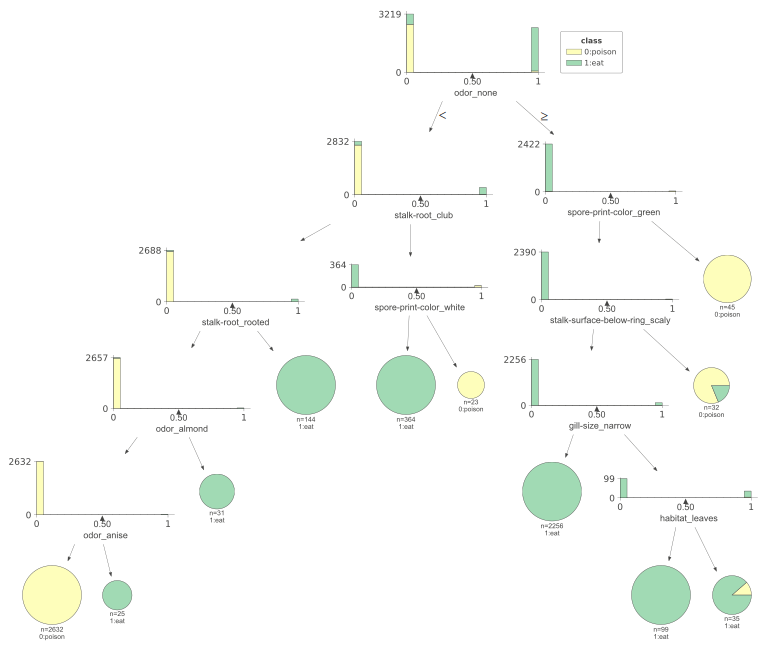

In [37]:
from sklearn.datasets import *
from sklearn import tree
from dtreeviz.trees import *
import graphviz

viz = dtreeviz(dt,X_train=X_train,
               y_train=y_train,
               target_name='class',
               class_names=['0:poison','1:eat'],
               ticks_fontsize=12.0,
               feature_names=X_test.columns)
              
display(viz)